<a href="https://colab.research.google.com/github/alexlih/2022_MLAI_HW1-Auto_Trading/blob/main/stock_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving training_data.csv to training_data.csv


In [3]:
#Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Importing dataset

data = pd.read_csv('training_data.csv',names=['open','high','low','close'] )
df = pd.DataFrame(data)
df

In [ ]:
len(df)

In [ ]:
df.describe()

In [ ]:
# showing column wise %ge of NaN values they contains 

for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)

In [ ]:
close = df.reset_index()['close']
close.head()

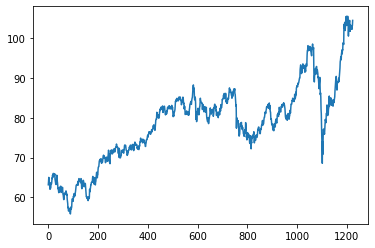

In [13]:
plt.plot(close)
plt.show()

In [14]:
time_step = 19

X, y = [], []

for i in range(len(close)-time_step-1):
    X.append(close[i:(i+time_step)])
    y.append(close[(i+time_step)])

X = np.array(X)
y = np.array(y)

In [ ]:
X[:5]

In [16]:
y[:5]

array([65.050003, 66.      , 65.75    , 65.949997, 65.949997])

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,63.150002,63.900002,65.000000,64.849998,63.450001,63.799999,62.349998,62.000000,62.250000,62.250000,62.400002,63.599998,63.250000,63.400002,63.900002,64.849998,64.699997,65.550003,65.300003
1,63.900002,65.000000,64.849998,63.450001,63.799999,62.349998,62.000000,62.250000,62.250000,62.400002,63.599998,63.250000,63.400002,63.900002,64.849998,64.699997,65.550003,65.300003,65.050003
2,65.000000,64.849998,63.450001,63.799999,62.349998,62.000000,62.250000,62.250000,62.400002,63.599998,63.250000,63.400002,63.900002,64.849998,64.699997,65.550003,65.300003,65.050003,66.000000
3,64.849998,63.450001,63.799999,62.349998,62.000000,62.250000,62.250000,62.400002,63.599998,63.250000,63.400002,63.900002,64.849998,64.699997,65.550003,65.300003,65.050003,66.000000,65.750000
4,63.450001,63.799999,62.349998,62.000000,62.250000,62.250000,62.400002,63.599998,63.250000,63.400002,63.900002,64.849998,64.699997,65.550003,65.300003,65.050003,66.000000,65.750000,65.949997


In [24]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=False)

Acc = []

In [ ]:
y_test

In [26]:
X_train_ = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_ = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [27]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def regCNN():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [28]:
# Model Training

model_3 = regCNN()
model_3.fit(X_train_, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
22/22 [==============================] - 1s 15ms/step - loss: 1138.3850 - val_loss: 46.2032
Epoch 2/200
22/22 [==============================] - 0s 9ms/step - loss: 33.0099 - val_loss: 4.4711
Epoch 3/200
22/22 [==============================] - 0s 8ms/step - loss: 4.8277 - val_loss: 5.9823
Epoch 4/200
22/22 [==============================] - 0s 8ms/step - loss: 3.3072 - val_loss: 4.6105
Epoch 5/200
22/22 [==============================] - 0s 8ms/step - loss: 2.7217 - val_loss: 4.6175
Epoch 6/200
22/22 [==============================] - 0s 8ms/step - loss: 3.1118 - val_loss: 4.8017
Epoch 7/200
22/22 [==============================] - 0s 9ms/step - loss: 2.7038 - val_loss: 4.5691
Epoch 8/200
22/22 [==============================] - 0s 8ms/step - loss: 3.0803 - val_loss: 5.6791
Epoch 9/200
22/22 [==============================] - 0s 9ms/step - loss: 3.7484 - val_loss: 4.3803
Epoch 10/200
22/22 [==============================] - 0s 9ms/step - loss: 2.9542 - val_loss: 4.8963
Epo

In [29]:
# Prediction

y_pred_3 = model_3.predict(X_test_)

12/12 [==============================] - 0s 2ms/step


In [30]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
0,79.349998,78.036842
1,78.150002,78.393738
2,78.650002,77.640717
3,78.500000,77.431412
4,78.500000,77.521561


In [31]:
len(y_test)

362

In [32]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.9531347679917211


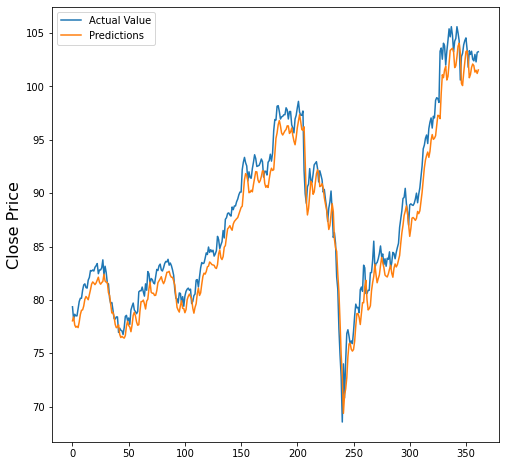

In [33]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

In [34]:
from google.colab import files
uploaded = files.upload()

Saving testing_data.csv to testing_data.csv


In [35]:
# Importing dataset

testdata = pd.read_csv('testing_data.csv',names=['open','high','low','close'] )
testdf = pd.DataFrame(testdata)

In [36]:
testclose = testdf.reset_index()['close']
testclose.head()

0    104.949997
1    106.550003
2    105.400002
3    105.300003
4    104.449997
Name: close, dtype: float64

In [37]:
time_step = 18
len(testclose)-time_step-1

1

In [38]:
len(testclose)

20

In [39]:
time_step = 19
X, y = [], []

for i in range(len(testclose)-time_step):
    print(i)
    X.append(testclose[i:(i+time_step)])
    y.append(testclose[(i+time_step)])

X = np.array(X)
y = np.array(y)

0


In [40]:
X[:5]

array([[104.949997, 106.550003, 105.400002, 105.300003, 104.449997,
        103.099998, 102.949997, 100.449997, 100.650002, 102.300003,
        102.550003, 103.      , 103.050003, 104.25    , 104.800003,
        106.199997, 107.050003, 107.099998, 106.699997]])

In [41]:
y[:5]

array([105.699997])

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,104.949997,106.550003,105.400002,105.300003,104.449997,103.099998,102.949997,100.449997,100.650002,102.300003,102.550003,103.0,103.050003,104.25,104.800003,106.199997,107.050003,107.099998,106.699997


In [43]:
X_test_ = X.reshape(X.shape[0],X.shape[1],1)

In [44]:
X_test_

array([[[104.949997],
        [106.550003],
        [105.400002],
        [105.300003],
        [104.449997],
        [103.099998],
        [102.949997],
        [100.449997],
        [100.650002],
        [102.300003],
        [102.550003],
        [103.      ],
        [103.050003],
        [104.25    ],
        [104.800003],
        [106.199997],
        [107.050003],
        [107.099998],
        [106.699997]]])

In [45]:
# Prediction

y_pred_3_test = model_3.predict(X_test_)

1/1 [==============================] - 0s 17ms/step


In [46]:
y_pred_3_test

array([[105.670456]], dtype=float32)

In [47]:
pred_df = pd.DataFrame({'Actual': y, 'Predicted': y_pred_3_test.flatten()})
pred_df.head()

,Actual,Predicted
0,105.699997,105.670456
